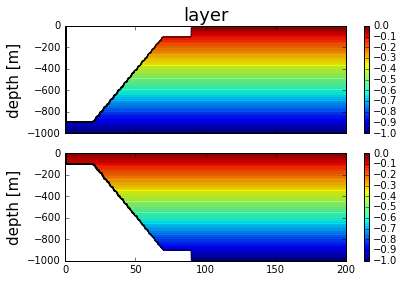

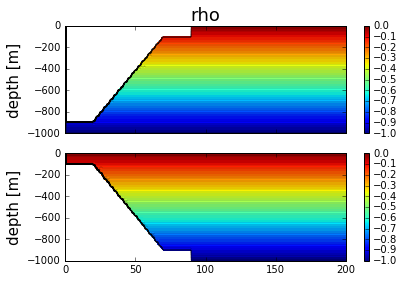

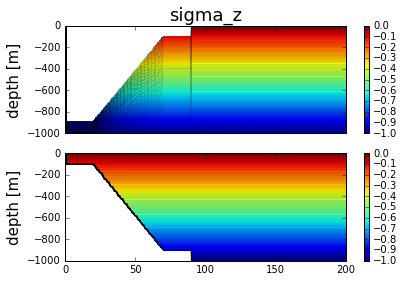

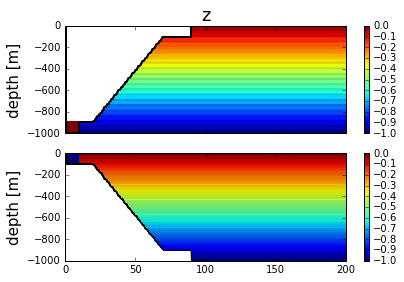

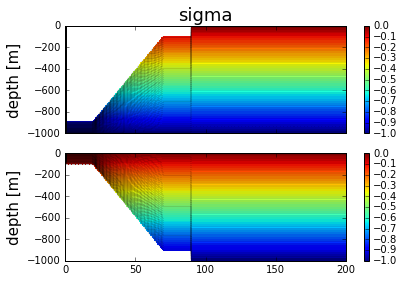

In [1]:
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
import sys
sys.path.append('plotting/')
from plotting import *
import netCDF4
import numpy as np

# Define a function to plot a section
def plot_section(file_handle, record, xq, i=2, variable='temp',eta='e',clim=(-1,0), plot_grid=True, rep='pcm', xlim=(0,200), ylim=(-1000,0), cmap=plt.cm.jet):
    """Plots a section of by reading vertical grid and scalar variable and super-sampling
    both in order to plot vertical and horizontal reconstructions.
    
    Optional arguments have defaults for plotting salinity and overlaying the grid.
    """
    e = file_handle.variables[eta][record,:,:,i] # Vertical grid positions
    s = file_handle.variables[variable][record,:,:,i] # Scalar field to color
    x,z,q = m6toolbox.section2quadmesh(xq, e, s, representation=rep) # This yields three areas at twice the model resolution
    plt.pcolormesh(x, z, q, cmap=cmap);
    plt.colorbar()
    plt.clim(clim)
    if plot_grid: plt.plot(x, z.T, 'k', lw=0.2, hold=True);
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.ylabel('depth [m]',fontsize=15)

# plot IC
path='/lustre/f1/unswept/Gustavo.Marques/MOM6-examples/ocean_only/outflow_ice_shelf/quiet/'
icfile = 'MOM_IC.nc'

coords = ['layer','rho','sigma_z','z','sigma']

for n in range(len(coords)):
   var_o = netCDF4.Dataset(path+coords[n]+'/outflow/'+icfile)
   var_i = netCDF4.Dataset(path+coords[n]+'/ice_shelf/'+icfile)
   # Read the horizontal coordinate which is the same for all configurations 
   xq = var_o.variables['latq'][:] # This is the coordinate of the cell corners (u-points in 1D)
   xq = np.concatenate(([0],xq)) # Inserts left most edge of domain in to coordinate
   record = 0
   # plot
   plt.figure()
   ax1 = plt.subplot(211); plot_section(var_i, record, xq, variable='Temp', eta='eta')
   plt.title(coords[n], fontsize=18)
   plt.tick_params(axis='x',labelbottom='off') 
   ax2 = plt.subplot(212); plot_section(var_o, record, xq, variable='Temp', eta='eta'); 
   plt.tight_layout()
   #plt.show()




